# Result Explorer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
import os
from process import performance

## Settings

In [2]:
sns.set('paper', 'white', font_scale=1.5,
        rc={'xtick.bottom': True,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            'ytick.left': True})
sns.set_palette(['lightcoral','maroon'])
pd.options.display.precision = 2
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
os.makedirs('img', exist_ok=True)
fmts = ['png', 'eps']

## Experiment on Knowledge Virus Ratio

In [4]:
problems = ['02', '14', '04', '27']
problem_names = ['SL', 'CO', 'CSL', 'MD']
seeds = range(1001, 1022)
rate_comparison = ['mix', 'mix2', 'mix3', 'mix4']
rate_label = ['k5', 'k10', 'k15', 'k20']
method_comparison = ['rand', 'adapt']
method_label = ['Rand', 'Adapt']

### Read experimental results

In [5]:
with open('dat.kratio.csv', 'w') as f:
    f.write(
        'problem;method;rate;seed;is_train_solved;is_test_solved;'\
        'train_error;test_error;generation\n'
    )
with open('dat.kratio.csv', 'a') as f:
    for problem, problem_name in zip(problems, problem_names):
        for method, label1 in zip(method_comparison, method_label):
            for rate, label2 in zip(rate_comparison, rate_label):
                for seed in seeds:
                    try:
                        pvector = performance(f'{problem}/dat/{method}_{rate}{seed}.log')
                        f.write(
                            '{};{};{};{};{};{};{};{};{}\n'.format(
                                problem_name,
                                label1,
                                label2,
                                seed,
                                *pvector
                            )
                        )
                    except Exception as e:
                        print(str(e))
dat = pd.read_csv('dat.kratio.csv', delimiter=';')
dat.head(3)

,problem,method,rate,seed,is_train_solved,is_test_solved,train_error,test_error,generation
0,SL,Rand,k5,1001,False,False,44.0,301.0,300
1,SL,Rand,k5,1002,False,False,70.0,300.0,300
2,SL,Rand,k5,1003,False,False,40.0,290.0,300


In [6]:
for problem in problem_names:
    dat.loc[dat.problem==problem, 'train_error'] = (
        dat[dat.problem==problem].train_error - \
            dat[dat.problem==problem].train_error.min()
    ) / (
        dat[dat.problem==problem].train_error.max() - \
            dat[dat.problem==problem].train_error.min()
    )
    dat.loc[dat.problem==problem, 'test_error'] = (
        dat[dat.problem==problem].test_error - \
            dat[dat.problem==problem].test_error.min()
    ) / (
        dat[dat.problem==problem].test_error.max() - \
            dat[dat.problem==problem].test_error.min()
    )

### Success rate

In [7]:
stat = dat.groupby([
    'rate',
    'problem',
    'method'
]).sum()[[
    'is_test_solved'
]]
stat

is_test_solved
rate problem method                
k10  CO      Adapt               16
             Rand                11
     CSL     Adapt               12
             Rand                11
     MD      Adapt               18
             Rand                11
     SL      Adapt               14
             Rand                10
k15  CO      Adapt               13
             Rand                14
     CSL     Adapt               12
             Rand                 3
     MD      Adapt               15
             Rand                 5
     SL      Adapt                7
             Rand                 6
k20  CO      Adapt                8
             Rand                 8
     CSL     Adapt               12
             Rand                 3
     MD      Adapt               14
             Rand                 5
     SL      Adapt                6
             Rand                 7
k5   CO      Adapt               14
             Rand                12
     CSL     Adapt               14
             Rand                11
     MD      Adapt               20
             Rand                17
     SL      Adapt               17
             Rand                15

In [8]:
for rate in rate_label:
    for problem_name in problem_names:
        v1, v2 = sorted(stat.is_test_solved[rate][problem_name].values, reverse=True)
        print(rate, problem_name, v1, v2, fisher_exact([[v1,v2],[21-v1,21-v2]]))

k5 SL 17 15 (1.7, 0.7185879381001337)
k5 CO 14 12 (1.5, 0.7513167417397034)
k5 CSL 14 11 (1.8181818181818181, 0.5302649566194443)
k5 MD 20 17 (4.705882352941177, 0.3433395872420253)
k10 SL 14 10 (2.2, 0.3498866999613092)
k10 CO 16 11 (2.909090909090909, 0.19710833761676178)
k10 CSL 12 11 (1.2121212121212122, 1.0)
k10 MD 18 11 (5.454545454545454, 0.04307100176494369)
k15 SL 7 6 (1.25, 1.0)
k15 CO 14 13 (1.2307692307692308, 1.0)
k15 CSL 12 3 (8.0, 0.008840482686761759)
k15 MD 15 5 (8.0, 0.004804479731375075)
k20 SL 7 6 (1.25, 1.0)
k20 CO 8 8 (1.0, 1.0)
k20 CSL 12 3 (8.0, 0.008840482686761759)
k20 MD 14 5 (6.4, 0.012173013388455993)


In [9]:
dat_ = dat.replace('k5', '5').replace('k10', '10').replace('k15', '15').replace('k20', '20')

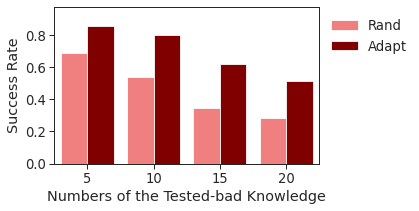

In [10]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='rate',
    y='is_train_solved',
    data=dat_,
    hue='method',
    errwidth=0,
    saturation=1
)
ax.set_xlabel('Numbers of the Tested-bad Knowledge')
ax.set_ylabel('Success Rate')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
plt.subplots_adjust(right=0.7, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/kratio.success.rate.train.{fmt}', dpi=600)

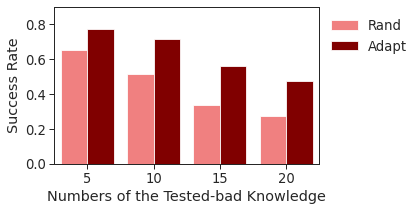

In [11]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='rate',
    y='is_test_solved',
    data=dat_,
    hue='method',
    errwidth=0,
    saturation=1
)
ax.set_xlabel('Numbers of the Tested-bad Knowledge')
ax.set_ylabel('Success Rate')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
plt.subplots_adjust(right=0.7, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/kratio.success.rate.test.{fmt}', dpi=600)

### Error

In [12]:
dat.groupby([
    'problem',
    'rate',
    'method'
]).aggregate([
    np.min,
    np.median,
    np.max,
    np.mean,
    np.std
])[[
    'train_error',
    'test_error'
]]

train_error                              test_error  \
                           amin median  amax      mean   std       amin   
problem rate method                                                       
CO      k10  Adapt          0.0   0.00  0.91  1.74e-01  0.32        0.0   
             Rand           0.0   0.00  1.00  3.82e-01  0.42        0.0   
        k15  Adapt          0.0   0.00  0.89  2.59e-01  0.37        0.0   
             Rand           0.0   0.00  0.93  2.30e-01  0.37        0.0   
        k20  Adapt          0.0   0.28  0.99  4.14e-01  0.41        0.0   
             Rand           0.0   0.64  0.95  4.87e-01  0.41        0.0   
        k5   Adapt          0.0   0.00  0.91  2.10e-01  0.35        0.0   
             Rand           0.0   0.00  1.00  3.06e-01  0.41        0.0   
CSL     k10  Adapt          0.0   0.00  0.08  7.94e-03  0.03        0.0   
             Rand           0.0   0.00  0.67  1.47e-01  0.24        0.0   
        k15  Adapt          0.0   0.00  0.42  5.16e-02  0.12        0.0   
             Rand           0.0   0.42  1.00  4.09e-01  0.36        0.0   
        k20  Adapt          0.0   0.00  0.58  9.13e-02  0.17        0.0   
             Rand           0.0   0.58  0.92  4.84e-01  0.32        0.0   
        k5   Adapt          0.0   0.00  0.00  0.00e+00  0.00        0.0   
             Rand           0.0   0.00  0.50  9.92e-02  0.17        0.0   
MD      k10  Adapt          0.0   0.00  0.91  7.60e-02  0.22        0.0   
             Rand           0.0   0.00  0.81  1.88e-01  0.24        0.0   
        k15  Adapt          0.0   0.00  0.89  1.33e-01  0.30        0.0   
             Rand           0.0   0.32  0.87  3.42e-01  0.28        0.0   
        k20  Adapt          0.0   0.00  0.70  7.80e-02  0.17        0.0   
             Rand           0.0   0.32  1.00  3.96e-01  0.35        0.0   
        k5   Adapt          0.0   0.00  0.21  1.01e-02  0.05        0.0   
             Rand           0.0   0.00  0.62  6.79e-02  0.16        0.0   
SL      k10  Adapt          0.0   0.00  0.77  1.24e-01  0.21        0.0   
             Rand           0.0   0.14  0.37  1.36e-01  0.14        0.0   
        k15  Adapt          0.0   0.27  0.93  3.17e-01  0.29        0.0   
             Rand           0.0   0.31  0.46  2.28e-01  0.16        0.0   
        k20  Adapt          0.0   0.31  1.00  3.45e-01  0.29        0.0   
             Rand           0.0   0.27  0.69  2.17e-01  0.19        0.0   
        k5   Adapt          0.0   0.00  1.00  1.08e-01  0.26        0.0   
             Rand           0.0   0.00  0.37  7.06e-02  0.12        0.0   

                                                             
                       median      amax      mean       std  
problem rate method                                          
CO      k10  Adapt   0.00e+00  5.62e-01  1.10e-01  2.03e-01  
             Rand    0.00e+00  5.34e-01  2.22e-01  2.43e-01  
        k15  Adapt   0.00e+00  5.41e-01  1.48e-01  2.15e-01  
             Rand    0.00e+00  6.11e-01  1.37e-01  2.22e-01  
        k20  Adapt   1.37e-01  1.00e+00  2.70e-01  2.92e-01  
             Rand    3.73e-01  6.41e-01  3.02e-01  2.56e-01  
        k5   Adapt   0.00e+00  6.19e-01  1.26e-01  2.10e-01  
             Rand    0.00e+00  7.51e-01  1.93e-01  2.67e-01  
CSL     k10  Adapt   0.00e+00  1.44e-05  2.25e-06  4.17e-06  
             Rand    0.00e+00  1.53e-05  3.85e-06  5.53e-06  
        k15  Adapt   0.00e+00  8.33e-01  4.76e-02  1.84e-01  
             Rand    3.50e-06  1.97e-05  7.82e-06  7.12e-06  
        k20  Adapt   0.00e+00  1.83e-05  5.17e-06  6.77e-06  
             Rand    1.12e-05  2.80e-05  9.75e-06  7.69e-06  
        k5   Adapt   0.00e+00  1.67e-01  7.94e-03  3.64e-02  
             Rand    0.00e+00  1.00e+00  4.76e-02  2.18e-01  
MD      k10  Adapt   0.00e+00  9.69e-01  7.90e-02  2.29e-01  
             Rand    0.00e+00  8.87e-01  2.01e-01  2.46e-01  
        k15  Adapt   0.00e+00  9.54e-01  1.64e-01  3.34e-01  
             Rand    3.44e-01 

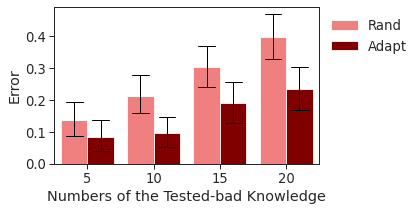

In [13]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='rate',
    y='train_error',
    data=dat_,
    hue='method',
    errcolor='black',
    errwidth=1,
    capsize=0.25,
    saturation=1
)
ax.set_xlabel('Numbers of the Tested-bad Knowledge')
ax.set_ylabel('Error')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
plt.subplots_adjust(right=0.7, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/kratio.error.train.{fmt}', dpi=600)

### Generation (successful runs)

In [14]:
dat.groupby([
    'problem',
    'method'
]).aggregate([
    np.min,
    np.median,
    np.max,
    np.mean,
    np.std
])['generation']

amin  median  amax    mean     std
problem method                                    
CO      Adapt     33   230.0   300  206.38   92.69
        Rand      23   277.5   300  222.73   93.61
CSL     Adapt     20   106.0   300  142.35   91.61
        Rand      49   300.0   300  239.48   81.82
MD      Adapt     11    54.5   300  103.93  102.86
        Rand       8   300.0   300  221.00  104.60
SL      Adapt     12   197.5   300  176.88  125.38
        Rand      14   300.0   300  210.93  108.63

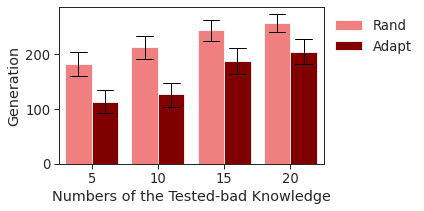

In [15]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.barplot(
    x='rate',
    y='generation',
    data=dat_,
    hue='method',
    errcolor='black',
    errwidth=1,
    capsize=0.25,
    saturation=1
)
ax.set_xlabel('Numbers of the Tested-bad Knowledge')
ax.set_ylabel('Generation')
ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
)
plt.subplots_adjust(right=0.7, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/kratio.generation.{fmt}', dpi=600)

In [16]:
stat = dat.groupby([
    'problem',
    'rate',
    'method'
]).sum()[[
    'is_test_solved'
]]
with open('dat.kratio.diff.csv', 'w') as f:
    f.write('problem;method;rate;diff\n')
with open('dat.kratio.diff.csv', 'a') as f:
    for problem in problem_names:
        for method in method_label:
            for rate in rate_label:
                s = '{};{};{};{}\n'.format(
                    problem, method, rate,
                    stat.is_test_solved[problem][rate][method] / stat.is_test_solved[problem]['k5'][method]
                )
                f.write(s)
dat = pd.read_csv('dat.kratio.diff.csv', delimiter=';')
dat.head(3)

,problem,method,rate,diff
0,SL,Rand,k5,1.00
1,SL,Rand,k10,0.67
2,SL,Rand,k15,0.40


In [17]:
dat_ = dat.replace('k5', '5').replace('k10', '10').replace('k15', '15').replace('k20', '20')

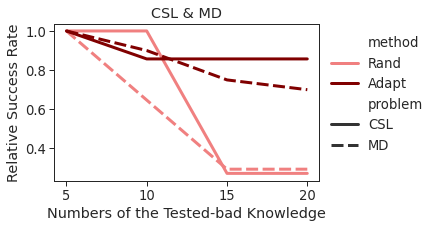

In [18]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.lineplot(
    x='rate',
    y='diff',
    data=dat_[(dat_.problem=='CSL') | (dat_.problem=='MD')],
    hue='method',
    style='problem',
    linewidth=3
)
ax.set_title('CSL & MD')
ax.set_xlabel('Numbers of the Tested-bad Knowledge')
ax.set_ylabel('Relative Success Rate')
leg = ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
    )
for line in leg.get_lines():
    line.set_linewidth(3)
plt.subplots_adjust(right=0.7, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/kratio.diff1.{fmt}', dpi=600)

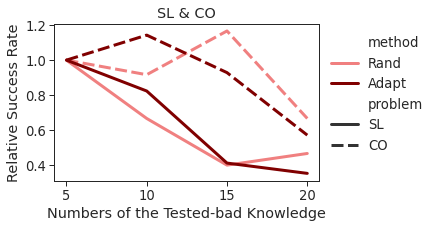

In [19]:
plt.figure(figsize=(6.4, 3.2))
ax = sns.lineplot(
    x='rate',
    y='diff',
    data=dat_[(dat_.problem=='SL') | (dat_.problem=='CO')],
    hue='method',
    style='problem',
    linewidth=3
)
ax.set_title('SL & CO')
ax.set_xlabel('Numbers of the Tested-bad Knowledge')
ax.set_ylabel('Relative Success Rate')
leg = ax.legend(
    bbox_to_anchor=(1., 1.),
    loc='upper left',
    facecolor='none',
    framealpha=0.
    )
for line in leg.get_lines():
    line.set_linewidth(3)
plt.subplots_adjust(right=0.7, bottom=0.2)
for fmt in fmts:
    plt.savefig(f'img/kratio.diff2.{fmt}', dpi=600)